In [ ]:
# Import the libraries that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the data set
# !gdown 1QBxu4XhFpoqDiXsyVU4w56MROHn1jZQM

In [ ]:
!gdown 1QBxu4XhFpoqDiXsyVU4w56MROHn1jZQM

Downloading...
From: https://drive.google.com/uc?id=1QBxu4XhFpoqDiXsyVU4w56MROHn1jZQM
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 193MB/s]


In [ ]:
netflix=pd.read_csv('netflix.csv')

In [ ]:
#explore the data

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [ ]:
netflix.shape

(8807, 12)

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix.isnull().sum()*100/len(netflix)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
#Count and Percentage of different show types in dataset

In [ ]:
netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
netflix['type'].value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [ ]:
#Data Preprocessing
#Unnesting the cast,listed_in , country columns

In [ ]:
cast=netflix.loc[:,['show_id','cast']]
genre=netflix.loc[:,['show_id','listed_in']]
country=netflix.loc[:,['show_id','country']]

In [ ]:
cast['cast']=cast['cast'].str.split(',')

In [ ]:
cast=cast.explode('cast',ignore_index=True)

In [ ]:
netflix_df=netflix.merge(cast,how='inner',on='show_id')

In [ ]:
# rename cast_x and cast_y

In [ ]:
netflix_df=netflix_df.rename({'cast_x':'cast_combined','cast_y':'cast'},axis=1)

In [ ]:
#Unnesting the listed_in column

In [ ]:
genre=netflix.loc[:,['show_id','listed_in']]

In [ ]:
genre['listed_in']=genre['listed_in'].str.split(',')

In [ ]:
genre=genre.explode('listed_in',ignore_index=True)

In [ ]:
netflix_df=netflix_df.merge(genre,on='show_id',how='inner')

In [ ]:
netflix_df=netflix_df.rename({'listed_in_x':'listed_in','listed_in_y':'genre'},axis=1)


In [ ]:
#Unnesting the country column

In [ ]:
country['country']=country['country'].str.split(',')

In [ ]:
country=country.explode('country',ignore_index=True)

In [ ]:
netflix_df=netflix_df.merge(country,how='inner',on='show_id')

In [ ]:
netflix_df=netflix_df.rename({'country_x':'country_combined','country_y':'country'},axis=1)

In [ ]:
# Dealing with null value

In [ ]:
netflix_test=netflix_df.copy()

In [ ]:
#Impute missing cast with NA

In [ ]:
netflix_test['cast_combined']=netflix_test['cast_combined'].fillna('NA')
netflix_test['cast']=netflix_test['cast'].fillna('NA')

In [ ]:
#We see missing values in duration column are present in rating column, so we copy them

In [ ]:
netflix_test[netflix_test['duration'].isnull()]
netflix_test.loc[netflix_test['duration'].isnull(),'duration']=netflix_test.loc[netflix_test['duration'].isnull(),'rating']

In [ ]:
netflix[netflix['duration'].isnull()]
netflix.loc[netflix['duration'].isnull(),'duration']=netflix.loc[netflix['duration'].isnull(),'rating']

In [ ]:
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
#We can see few errogrneous values in rating column, so we remove them

In [ ]:
netflix_test.loc[(netflix_test['rating']=='74 min')|(netflix_test['rating']=='84 min')|(netflix_test['rating']=='66 min'),'rating']=np.nan

In [ ]:
netflix_test['rating'].isnull().sum()

70

In [ ]:
#creating a rating lookup dataframe

In [ ]:
rating=netflix_test.groupby(['type','genre'])['rating'].agg(pd.Series.mode).reset_index()

In [ ]:
rating['rating'].value_counts()


TV-MA    36
TV-14    15
R         8
TV-PG     5
PG        4
TV-Y7     3
PG-13     2
Name: rating, dtype: int64

In [ ]:
netflix_test=netflix_test.merge(rating,how='left',on=['type','genre'])

In [ ]:
netflix_test=netflix_test.rename({'rating_x':'rating','rating_y':'rating_mode'},axis=1)


In [ ]:
netflix_test['rating'].fillna(netflix_test['rating_mode'],inplace=True)

In [ ]:
netflix_test['rating'].fillna('NA',inplace=True)

In [ ]:
netflix_test.drop(columns=['rating_mode'],inplace=True)

In [ ]:
#we will be using group by and bfill() , ffill() to impute null values in date_added column

In [ ]:
def date_add(df):
  df['date_added'].bfill(inplace=True)
  df['date_added'].ffill(inplace=True)
  return df

In [ ]:
netflix_test=netflix_test.groupby(['release_year']).apply(date_add)
netflix=netflix.groupby(['release_year']).apply(date_add)

<ipython-input-41-07770c1e50bf>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  netflix_test=netflix_test.groupby(['release_year']).apply(date_add)
<ipython-input-41-07770c1e50bf>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  netflix=netflix.groupby(['release_year']).apply(date_add)


In [ ]:
netflix_test['date_added']=pd.to_datetime(netflix_test['date_added'],errors='ignore')
netflix['date_added']=pd.to_datetime(netflix['date_added'],errors='ignore')

In [ ]:
netflix_test['year_added']=netflix_test['date_added'].dt.year
netflix_test['month_added']=netflix_test['date_added'].dt.month
netflix_test['week_added']=netflix_test['date_added'].dt.week
netflix['year_added']=netflix['date_added'].dt.year
netflix['month_added']=netflix['date_added'].dt.month
netflix['week_added']=netflix['date_added'].dt.week


<ipython-input-43-797bb0ea98d9>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  netflix_test['week_added']=netflix_test['date_added'].dt.week
<ipython-input-43-797bb0ea98d9>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  netflix['week_added']=netflix['date_added'].dt.week


In [ ]:
netflix_test['year_added']=netflix_test['year_added'].astype('int64',errors='ignore')
netflix_test['month_added']=netflix_test['month_added'].astype('int64',errors='ignore')
netflix_test['week_added']=netflix_test['week_added'].astype('int64',errors='ignore')
netflix['year_added']=netflix['year_added'].astype('int64',errors='ignore')
netflix['month_added']=netflix['month_added'].astype('int64',errors='ignore')
netflix['week_added']=netflix['week_added'].astype('int64',errors='ignore')

In [ ]:
#creating a directors lookup dataframe

In [ ]:
directors=netflix_test.groupby(['type','country','genre'])['director'].agg(pd.Series.mode).reset_index()

In [ ]:
netflix_test=netflix_test.merge(directors,how='left',on=['type','country','genre'])

In [ ]:
netflix_test=netflix_test.rename({'director_x':'director','director_y':'director_mode'},axis=1)

In [ ]:
netflix_test['director'].fillna(netflix_test['director_mode'],inplace=True)

In [ ]:
netflix_test['director'].fillna('NA',inplace=True)

In [ ]:
netflix_test.drop(columns=['director_mode'],inplace=True)

In [ ]:
#Imputation of country column

In [ ]:
netflix_test['country'].fillna('Unknown',inplace=True)

In [ ]:
netflix_test['country_combined'].fillna('Unknown',inplace=True)

In [ ]:
#Checking for data consistency


In [ ]:
netflix_test['type'].value_counts()

Movie      131931
TV Show     54468
Name: type, dtype: int64

In [ ]:
netflix_test['rating'].value_counts()

TV-MA       67734
TV-14       42054
R           23990
PG-13       15233
TV-PG       13778
PG           9011
TV-Y7        5804
TV-Y         3152
TV-G         2650
NR           1521
G            1151
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

In [ ]:
netflix_test['duration'].value_counts()

1 Season     33444
2 Seasons     9470
3 Seasons     5084
94 min        3591
97 min        3434
             ...  
5 min            3
9 min            2
3 min            2
11 min           2
8 min            1
Name: duration, Length: 220, dtype: int64

In [ ]:
netflix_test[['dur','col2']]=netflix_test['duration'].str.split(pat=' ',expand=True)
netflix_test.drop(columns=['col2','duration'],inplace=True)
netflix_test=netflix_test.rename({'dur':'duration'},axis=1)

In [ ]:
netflix[['dur','col2']]=netflix['duration'].str.split(pat=' ',expand=True)
netflix.drop(columns=['col2','duration'],inplace=True)
netflix=netflix.rename({'dur':'duration'},axis=1)

In [ ]:
netflix_test['genre'].value_counts().index

Index([' International Movies', 'Dramas', 'Comedies', 'Action & Adventure',
       ' Dramas', ' Independent Movies', ' TV Dramas',
       'Children & Family Movies', 'International TV Shows',
       ' Romantic Movies', ' Thrillers', ' Comedies',
       ' International TV Shows', 'Crime TV Shows', 'Kids' TV', ' TV Comedies',
       ' Sci-Fi & Fantasy', 'Horror Movies', ' Music & Musicals',
       ' Romantic TV Shows', 'Anime Series', ' Spanish-Language TV Shows',
       'Documentaries', 'British TV Shows', ' TV Action & Adventure',
       ' Sports Movies', ' TV Mysteries', 'TV Comedies', ' Korean TV Shows',
       'International Movies', ' Horror Movies', ' TV Sci-Fi & Fantasy',
       'TV Dramas', 'Classic Movies', ' Cult Movies', 'Thrillers',
       ' LGBTQ Movies', ' Kids' TV', ' Teen TV Shows', ' TV Horror',
       ' TV Thrillers', ' Crime TV Shows', ' Faith & Spirituality',
       'TV Action & Adventure', ' Anime Features', 'Docuseries',
       'Stand-Up Comedy', ' Classic Movies',

In [ ]:
netflix_test['genre']=netflix_test['genre'].str.lstrip()
netflix_test['genre']=netflix_test['genre'].str.rstrip()

In [ ]:
netflix_test['genre'].nunique()

42

In [ ]:
netflix_test.loc[netflix_test['genre'].str.startswith('D'),['genre']].value_counts()

genre        
Dramas           27799
Documentaries     2042
Docuseries         801
dtype: int64

In [ ]:
netflix_test['country']=netflix_test['country'].str.lstrip()
netflix_test['country']=netflix_test['country'].str.rstrip()

In [ ]:
netflix_test['country'].value_counts().index

Index(['United States', 'India', 'United Kingdom', 'Unknown', 'Japan',
       'France', 'Canada', 'Spain', 'South Korea', 'Germany',
       ...
       'Afghanistan', 'Sri Lanka', 'Mongolia', 'Panama', 'Armenia', 'Samoa',
       'Botswana', 'Nicaragua', 'Kazakhstan', 'Uganda'],
      dtype='object', length=124)

In [ ]:
netflix_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186399 entries, 0 to 186398
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   show_id           186399 non-null  object        
 1   type              186399 non-null  object        
 2   title             186399 non-null  object        
 3   director          186399 non-null  object        
 4   cast_combined     186399 non-null  object        
 5   country_combined  186399 non-null  object        
 6   date_added        186399 non-null  datetime64[ns]
 7   release_year      186399 non-null  int64         
 8   rating            186399 non-null  object        
 9   listed_in         186399 non-null  object        
 10  description       186399 non-null  object        
 11  cast              186399 non-null  object        
 12  genre             186399 non-null  object        
 13  country           186399 non-null  object        
 14  year

In [ ]:
netflix_test['type'].value_counts()

Movie      131931
TV Show     54468
Name: type, dtype: int64

In [ ]:
#Create separate data frame for Movies and TV Series

In [ ]:
movies=netflix_test.loc[netflix_test['type']=='Movie']

In [ ]:
series=netflix_test.loc[netflix_test['type']=='TV Show']

In [ ]:
#Datasets for Analysis
#netflix --> original dataset
#netflix_test --> preprocessed dataset
#movies --> dataset containing only movies data
#series --> dataset containing only TV series data

In [ ]:
#Content Release in each month and week

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
 11  year_added    8807 non-null   int64         
 12  month_added   8807 non-null   int64         
 13  week_added    8807 non-null   int64         
 14  duration      8807 non-null   object        
dtypes: datetime64[ns](1), int64(4), object

<Axes: xlabel='month_added', ylabel='count'>

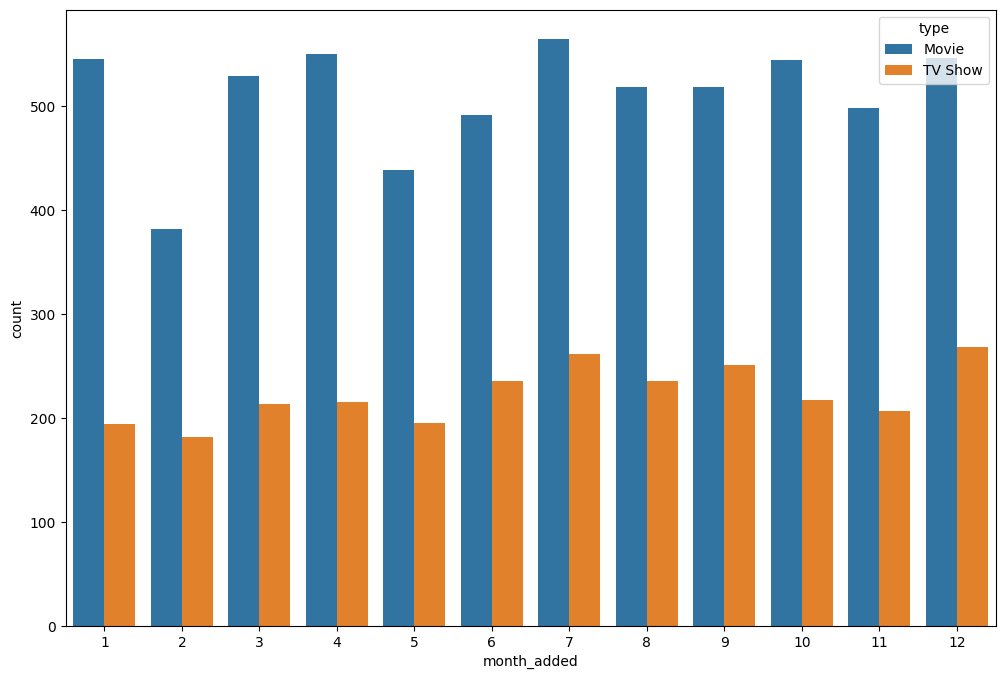

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=netflix,x='month_added',hue='type')


Text(0.5, 1.0, 'TV Show')

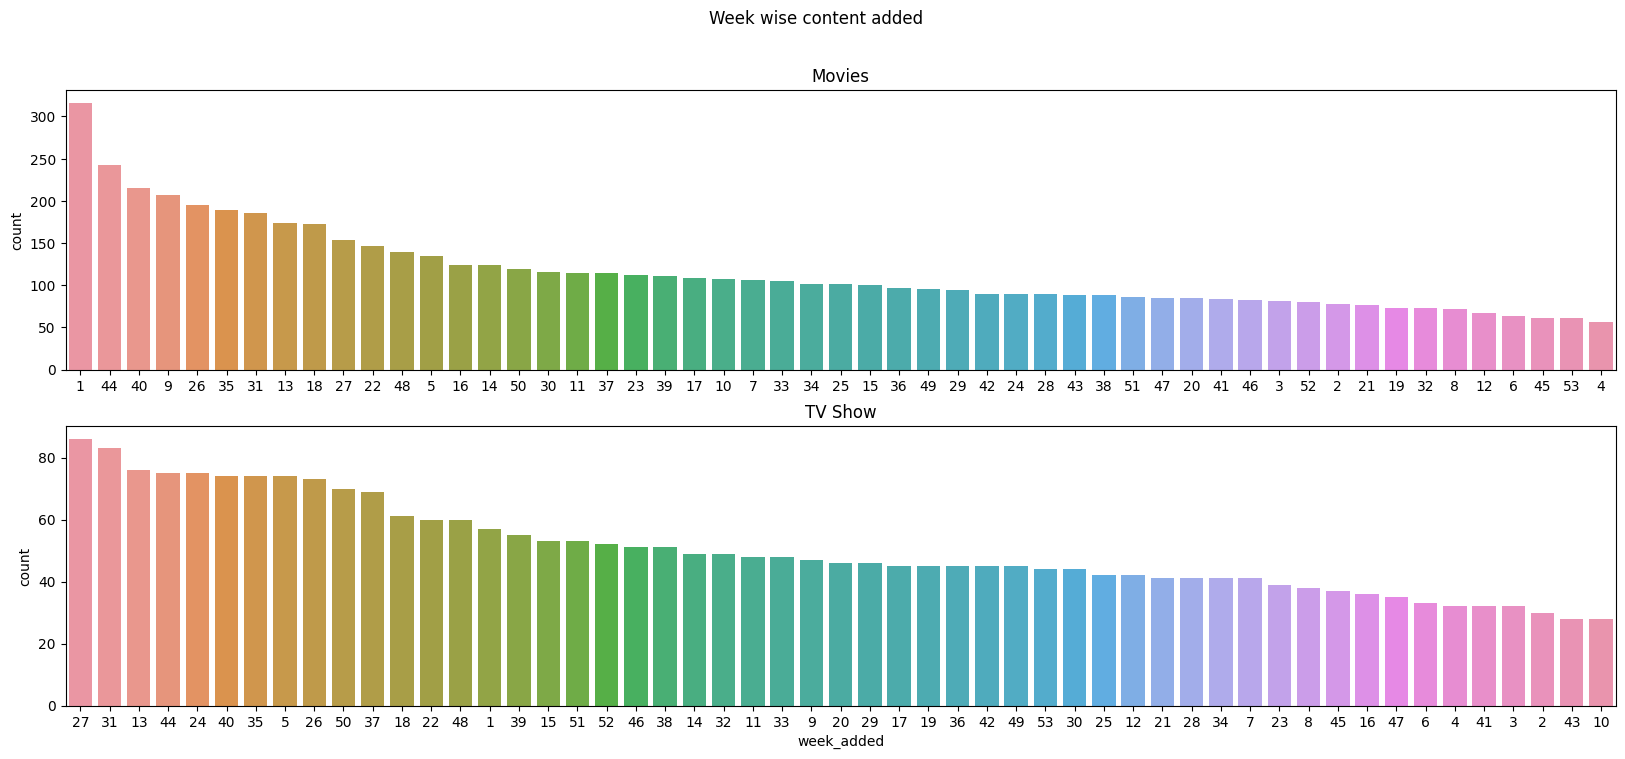

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.suptitle("Week wise content added")
sns.countplot(x='week_added',data=movie_df,order=movie_df['week_added'].value_counts().index)
plt.xlabel('',loc='left')
plt.title('Movies')
plt.subplot(2,1,2)
sns.countplot(x='week_added',data=series_df,order=series_df['week_added'].value_counts().index)
plt.title('TV Show')


In [ ]:
# Top 10 countries with highest content released

In [ ]:
top_10_countries=netflix.loc[~netflix['country'].isnull()]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'South Korea'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Egypt')])

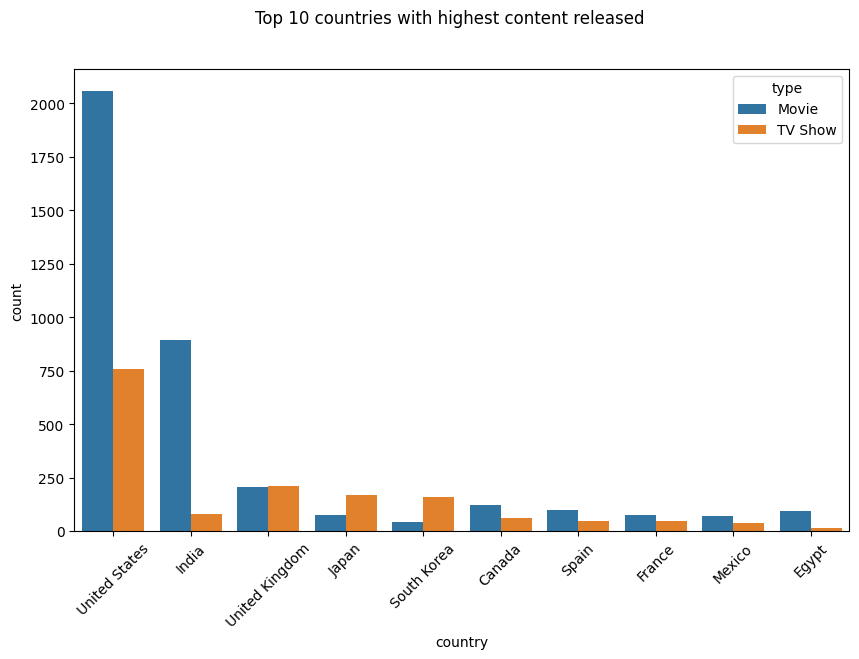

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=top_10_countries,x='country',order=top_10_countries['country'].value_counts().index[:10],hue='type')
plt.suptitle('Top 10 countries with highest content released')
plt.xticks(rotation=45)

In [ ]:
# Year wise content added

In [ ]:
movie_yoy=netflix.loc[netflix['type']=='Movie'].groupby('year_added')['show_id'].count().reset_index()
series_yoy=netflix.loc[netflix['type']=='TV Show'].groupby('year_added')['show_id'].count().reset_index()
movie_yoy.rename({'show_id':'count'},axis=1,inplace=True)
series_yoy.rename({'show_id':'count'},axis=1,inplace=True)

In [ ]:
movie_yoy['year_added']=movie_yoy['year_added'].astype('int64')
series_yoy['year_added']=series_yoy['year_added'].astype('int64')

Text(0, 0.5, 'Count')

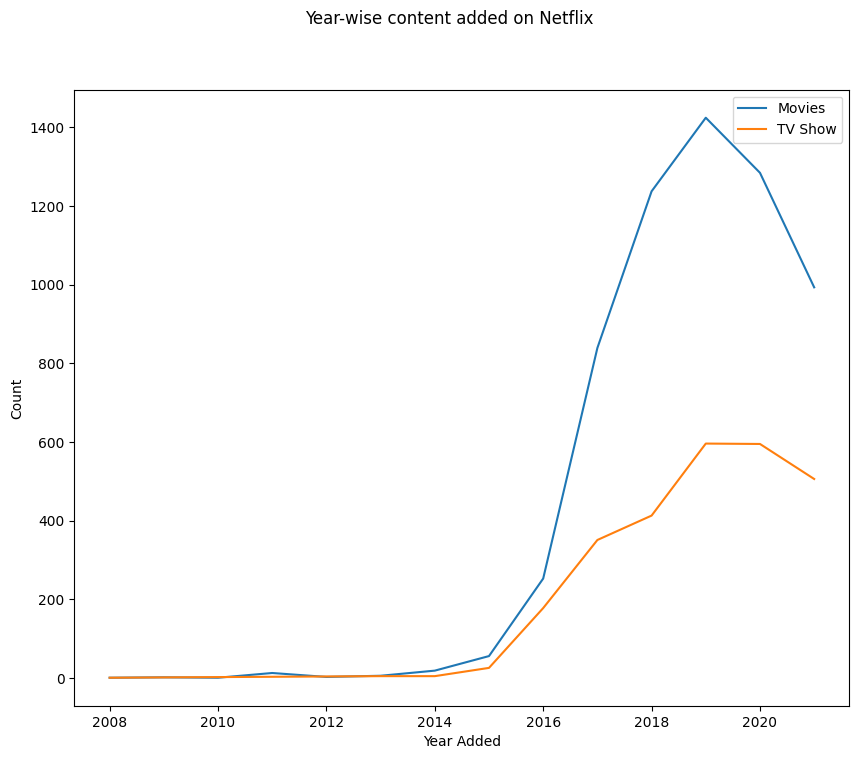

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=movie_yoy,x='year_added',y='count',label='Movies')
sns.lineplot(data=series_yoy,x='year_added',y='count',label='TV Show')
plt.suptitle('Year-wise content added on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Count')

In [ ]:
# Released year of contents

In [ ]:
movie_rel=netflix.loc[netflix['type']=='Movie'].groupby('release_year')['show_id'].count().reset_index()
series_rel=netflix.loc[netflix['type']=='TV Show'].groupby('release_year')['show_id'].count().reset_index()
movie_rel.rename({'show_id':'count'},axis=1,inplace=True)
series_rel.rename({'show_id':'count'},axis=1,inplace=True)

Text(0, 0.5, 'Count')

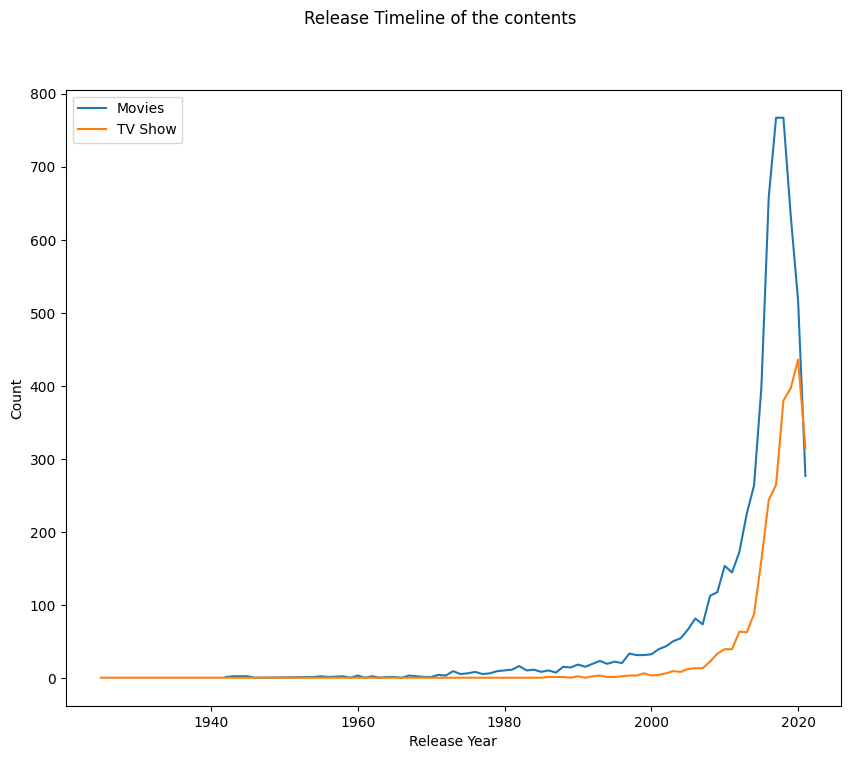

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=movie_rel,x='release_year',y='count',label='Movies')
sns.lineplot(data=series_rel,x='release_year',y='count',label='TV Show')
plt.suptitle('Release Timeline of the contents')
plt.xlabel('Release Year')
plt.ylabel('Count')

In [ ]:
#Ideal duration of a Movie or TV show

In [ ]:
#Preprocessing

In [ ]:
movie_df=netflix.loc[netflix['type']=='Movie']
series_df=netflix.loc[netflix['type']=='TV Show']

In [ ]:
movie_df['duration']=movie_df['duration'].astype('int64')

<ipython-input-113-0fb6e40dcc7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration']=movie_df['duration'].astype('int64')


In [ ]:
movie_df['hrs']=pd.cut(movie_df['duration'],bins=[0,60,90,120,150,180,320],labels=['<1hr','1-1.5 hr','1.5-2 hr','2-2.5 hr','2.5-3 hr','> 3hr'])

<ipython-input-114-6bb08f331285>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['hrs']=pd.cut(movie_df['duration'],bins=[0,60,90,120,150,180,320],labels=['<1hr','1-1.5 hr','1.5-2 hr','2-2.5 hr','2.5-3 hr','> 3hr'])


In [ ]:
#Ideal duration of a Movie or TV show
#Plot

Text(0.5, 0, 'Seasons')

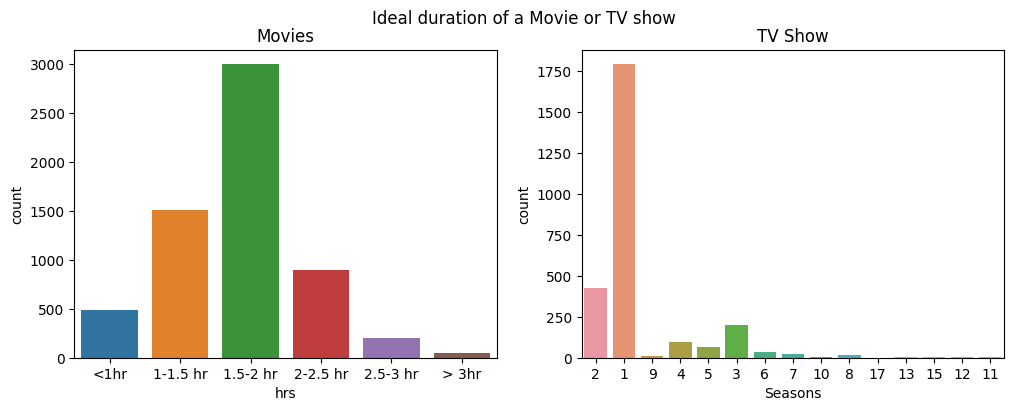

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.suptitle('Ideal duration of a Movie or TV show')
plt.title('Movies')
sns.countplot(data=movie_df,x='hrs')
plt.subplot(1,2,2)
plt.title('TV Show')
sns.countplot(data=series_df,x='duration')
plt.xlabel('Seasons')

In [ ]:
#Top Ten Genres for Movies and TV shows

In [ ]:
top10_movie_genre=movies.loc[movies['genre'].isin(movies['genre'].value_counts().index[:10])]
top10_series_genre=series.loc[series['genre'].isin(series['genre'].value_counts().index[:10])]

In [ ]:
top10_movie_genre['duration']=top10_movie_genre['duration'].astype('int64')
top10_series_genre['duration']=top10_series_genre['duration'].astype('int64')

<ipython-input-93-e2642d357a2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_movie_genre['duration']=top10_movie_genre['duration'].astype('int64')
<ipython-input-93-e2642d357a2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_series_genre['duration']=top10_series_genre['duration'].astype('int64')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Dramas'),
  Text(1, 0, 'International Movies'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'Action & Adventure'),
  Text(4, 0, 'Independent Movies'),
  Text(5, 0, 'Children & Family Movies'),
  Text(6, 0, 'Thrillers'),
  Text(7, 0, 'Romantic Movies'),
  Text(8, 0, 'Horror Movies'),
  Text(9, 0, 'Sci-Fi & Fantasy')])

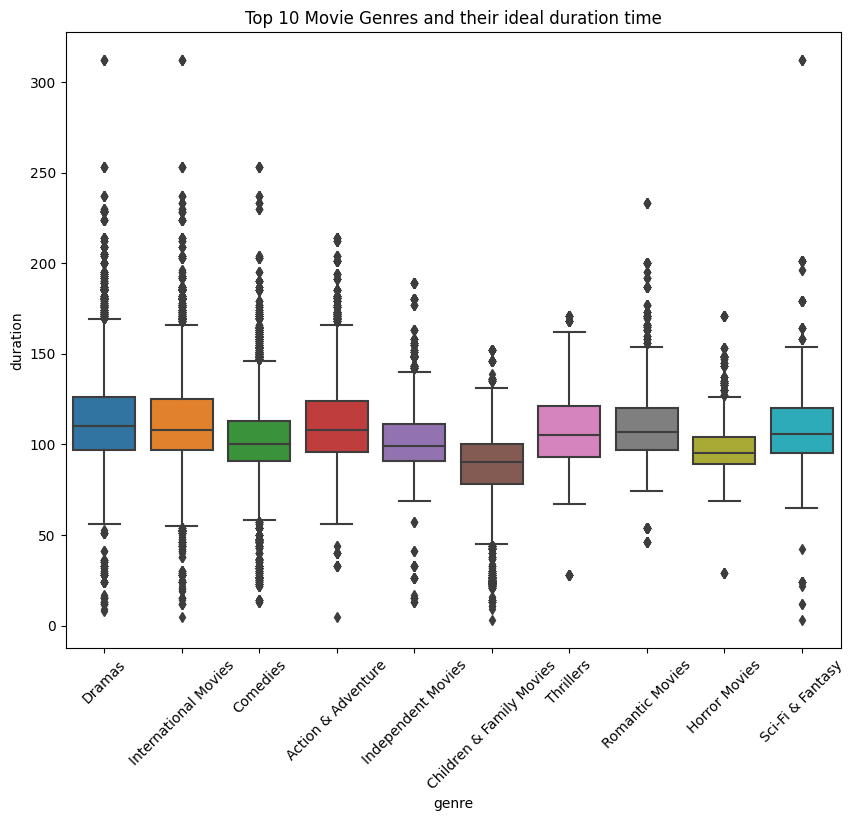

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Top 10 Movie Genres and their ideal duration time")
sns.boxplot(top10_movie_genre,x='genre',y='duration',order=top10_movie_genre['genre'].value_counts().index[:10])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'International TV Shows'),
  Text(1, 0, 'TV Dramas'),
  Text(2, 0, 'Crime TV Shows'),
  Text(3, 0, 'TV Action & Adventure'),
  Text(4, 0, 'Romantic TV Shows'),
  Text(5, 0, 'TV Comedies'),
  Text(6, 0, 'British TV Shows'),
  Text(7, 0, 'Spanish-Language TV Shows'),
  Text(8, 0, "Kids' TV"),
  Text(9, 0, 'Anime Series')])

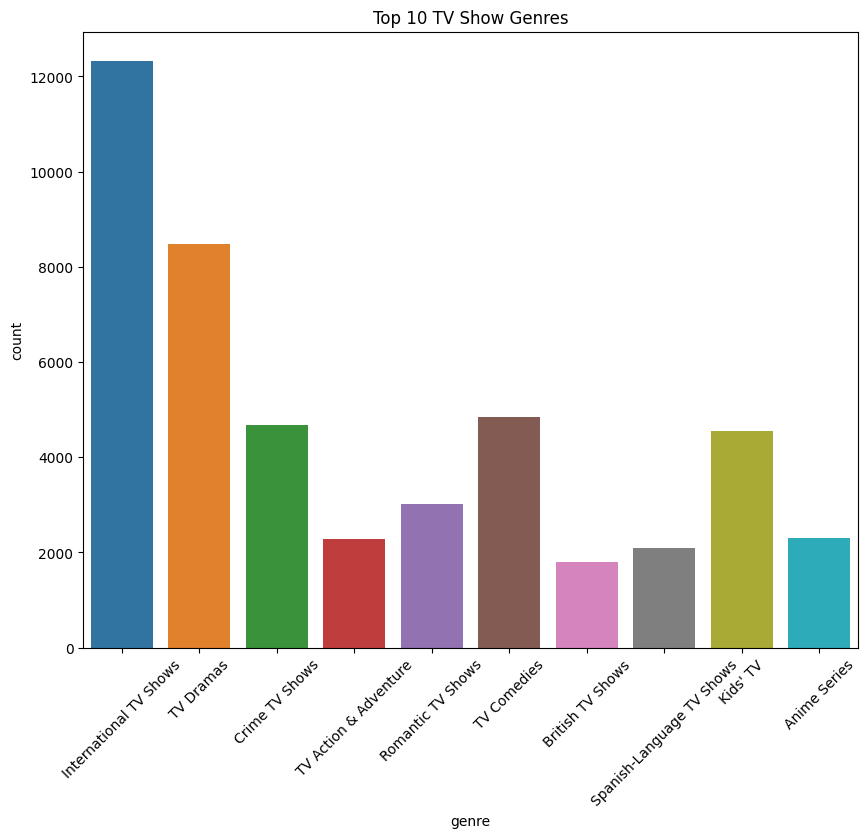

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=top10_series_genre,x='genre')
plt.title('Top 10 TV Show Genres')
plt.xticks(rotation=45)

In [ ]:
# Content released on each week

In [ ]:
weekly_release=netflix.groupby(['week_added'])['show_id'].count().reset_index()
weekly_release.rename({'show_id':'count'},axis=1,inplace=True)

Text(0.5, 1.0, 'Weekly Content Released')

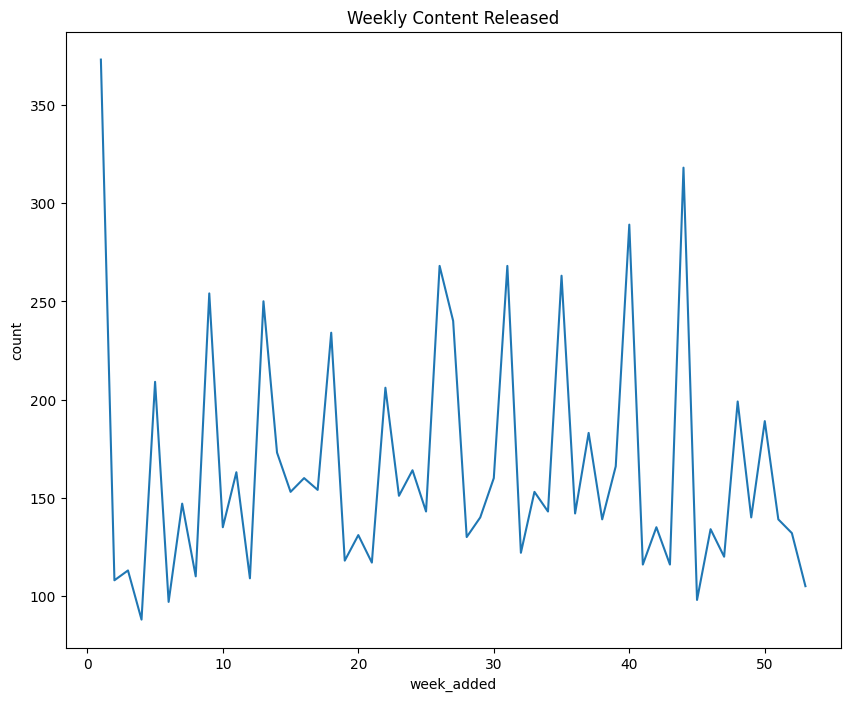

In [ ]:
plt.figure(figsize=(10,8))
sns.lin(data=weekly_release,x='week_added',y='count')
plt.title('Weekly Content Released')

In [ ]:
#

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,year_added,month_added,week_added,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",2021,9,38,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,38,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,38,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,38,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,38,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 186399 entries, 0 to 186398
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   show_id           186399 non-null  object        
 1   type              186399 non-null  object        
 2   title             186399 non-null  object        
 3   director          186399 non-null  object        
 4   cast_combined     186399 non-null  object        
 5   country_combined  186399 non-null  object        
 6   date_added        186399 non-null  datetime64[ns]
 7   release_year      186399 non-null  int64         
 8   rating            186399 non-null  object        
 9   listed_in         186399 non-null  object        
 10  description       186399 non-null  object        
 11  cast              186399 non-null  object        
 12  genre             186399 non-null  object        
 13  country           186399 non-null  object        
 14  year

In [ ]:
netflix_test['duration']=netflix_test['duration'].astype('int64')

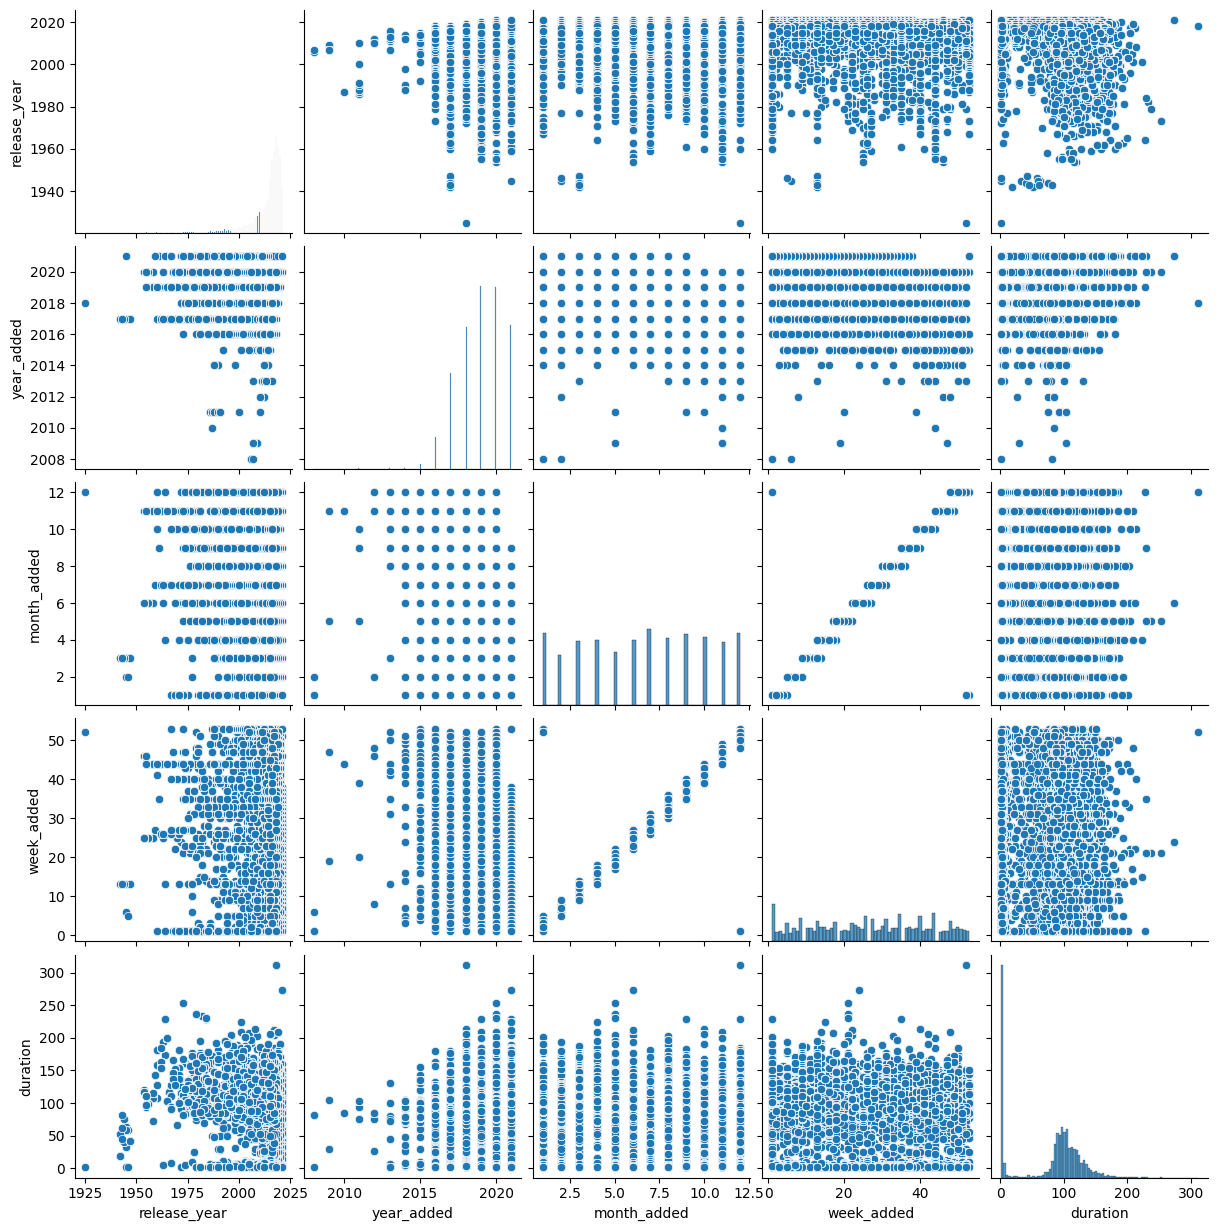

In [ ]:
sns.pairplot(netflix_test)

In [ ]:
#Corelation between year of Release and Duration

Text(0.5, 0.98, 'Release year v/s Duration')

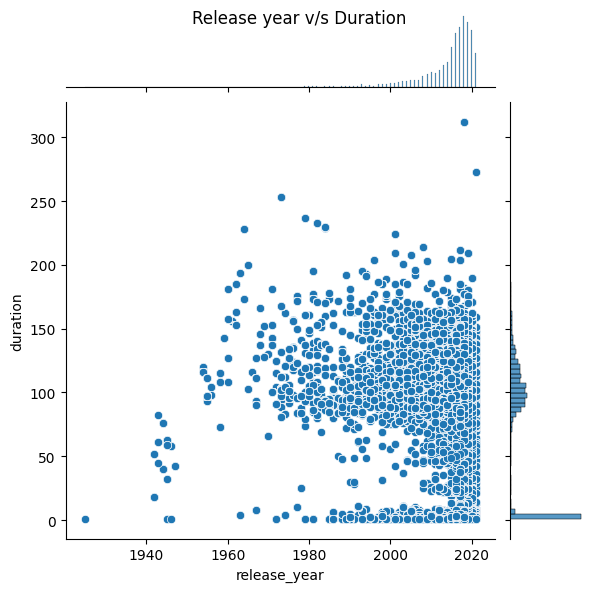

In [ ]:
sns.jointplot(data=netflix_test,x='release_year',y='duration')
plt.suptitle('Release year v/s Duration')

In [ ]:
# Top 5 TV show genres among top 5 countries

In [ ]:
top5_tv_countries=series_df['country'].value_counts().index[:5]
top5_tv_genre=series['genre'].value_counts().index[:5]

In [ ]:
top5_tv_df=series.loc[(series['country'].isin(top5_tv_countries))&(series['genre'].isin(top5_tv_genre))]

In [ ]:
top5_tv_df['genre'].value_counts()

International TV Shows    4775
TV Dramas                 3647
TV Comedies               2865
Kids' TV                  2578
Crime TV Shows            1827
Name: genre, dtype: int64

Text(0.5, 0, 'Country')

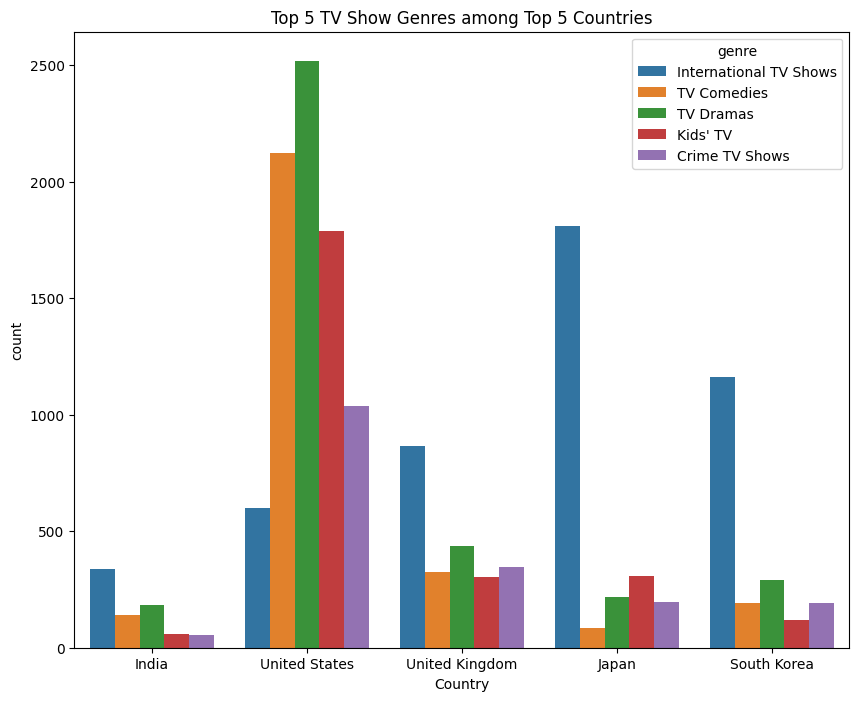

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=top5_tv_df,x='country',hue='genre')
plt.title('Top 5 TV Show Genres among Top 5 Countries')
plt.xlabel('Country')


In [ ]:
# Top 5 movie genres among top 5 countries

In [ ]:
top5_tv_countries=movies['country'].value_counts().index[:5]
top5_tv_genre=movies['genre'].value_counts().index[:5]

In [ ]:
top5_movie_df=movies.loc[(movies['country'].isin(top5_tv_countries))&(movies['genre'].isin(top5_tv_genre))]

Text(0.5, 0, 'Country')

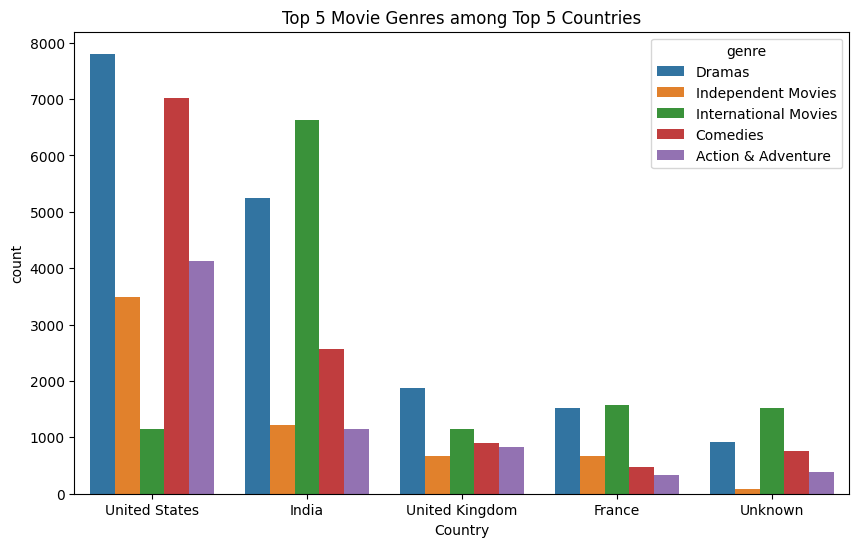

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=top5_movie_df,x='country',hue='genre',order=top5_tv_countries)
plt.title('Top 5 Movie Genres among Top 5 Countries')
plt.xlabel('Country')
